In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pyrealsense2 as rs
from pyntcloud import PyntCloud

In [2]:
#pointcloud
pipeline = rs.pipeline()
config = rs.config()    
rs.config.enable_device_from_file(config, 'simplecam1.bag')
config.enable_stream(rs.stream.depth, 848, 480, rs.format.z16, 90)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 60)
#start streaming
pipeline.start(config)



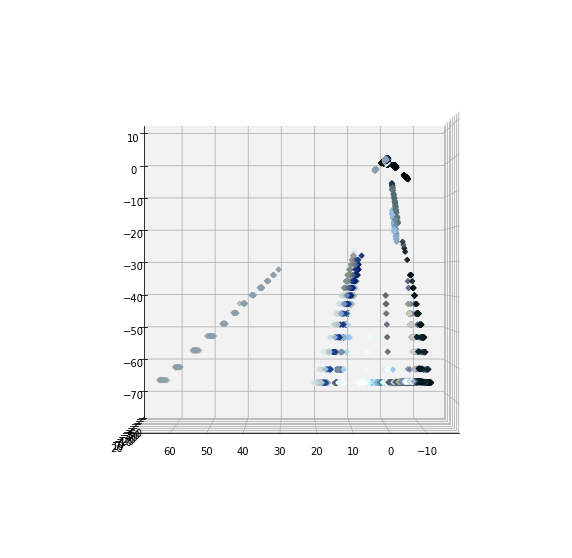

In [5]:
pc = rs.pointcloud()
points = rs.points()
frames = pipeline.wait_for_frames()
depth = frames.get_depth_frame()
color = frames.get_color_frame()
pc.map_to(color)

pointcloud = pc.calculate(depth)
pointcloud.export_to_ply("2.ply", color)
cloud = PyntCloud.from_file("2.ply")
cloud.plot()